<a href="https://colab.research.google.com/github/omkar123katare/Feature-selection-using-ANOVA-for-regression-and-classification/blob/main/Feature_selection_ANOVA_fore_regression_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANOVA**

##**Here while calculating the F-scores, mean is to be computed. This requires us to convert the categorical column into numerical by encoding. So, categorical features as it is cannot be used here.**

##***Feature selction for regression problem using ANOVA ( analysis of variance ) and F- test.***

1. This is a univariate test. This is used for testing the individual effect of each of feature with the target column one by one. (each feature is givev a f-score which denoted importance associated with these features.). From the top important features, using the business knowledge, we select the further more important features. We train our models using these short listed features.
2.  This method is well suited for continuous variables with binary target. But, sklearn extends it to regression problems also.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
path='https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Cancer/cancer_reg.csv'

In [39]:
df_cancer=pd.read_csv(path,encoding='ISO-8859-1')

In [41]:
df_cancer.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [6]:
df_cancer.shape

(3047, 34)

We have **34 features**. Our output feature is **Target_deathRate**.

In [7]:
df_cancer.drop(['Geography','binnedInc'],axis=1,inplace=True)

In [8]:
df_cancer.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [13]:
df_cancer.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
TARGET_deathRate             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctSomeCol18_24              0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over         152
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    609
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
dtype: i

In [12]:
df_cancer['PctSomeCol18_24']=df_cancer['PctSomeCol18_24'].fillna(df_cancer['PctSomeCol18_24'].mean())

In [15]:
df_cancer['PctEmployed16_Over']=df_cancer['PctEmployed16_Over'].fillna(df_cancer['PctEmployed16_Over'].mean())

In [16]:
df_cancer['PctPrivateCoverageAlone']=df_cancer['PctPrivateCoverageAlone'].fillna(df_cancer['PctPrivateCoverageAlone'].mean())

In [19]:
df_cancer.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [21]:
x_ip=df_cancer.drop('TARGET_deathRate',axis=1)
y_op=df_cancer['TARGET_deathRate']

In [34]:
x_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   incidenceRate            3047 non-null   float64
 3   medIncome                3047 non-null   int64  
 4   popEst2015               3047 non-null   int64  
 5   povertyPercent           3047 non-null   float64
 6   studyPerCap              3047 non-null   float64
 7   MedianAge                3047 non-null   float64
 8   MedianAgeMale            3047 non-null   float64
 9   MedianAgeFemale          3047 non-null   float64
 10  AvgHouseholdSize         3047 non-null   float64
 11  PercentMarried           3047 non-null   float64
 12  PctNoHS18_24             3047 non-null   float64
 13  PctHS18_24               3047 non-null   float64
 14  PctSomeCol18_24         

In [25]:
print(type(y_op))
print(type(x_ip))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


##**Start**

In [28]:
from sklearn.feature_selection import f_regression,SelectKBest

**f_regression()**

Univariate linear regression tests.


This is done in 2 steps:

1. The corelation between each regressor and the target is computed, i.e. ((X[:,i]- mean(x[:,i]))*(y-mean_y))/(std(X[:,i])*std(y)).
2. It is converted to an F score then to a P-value.

In [72]:
# apply SelectKBest classs to extract top 30 bect feature

fs=SelectKBest(score_func=f_regression,k=10)

# apply feature selection

fit=fs.fit(x_ip,y_op)

In [73]:
print(np.round(fit.pvalues_,4))

[0.     0.     0.     0.     0.     0.     0.2188 0.8092 0.2262 0.5062
 0.0416 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.    ]


In [74]:
print(np.round(fit.scores_,3))

[6.40510e+01 2.52660e+01 7.70736e+02 6.85295e+02 4.45440e+01 6.88333e+02
 1.51300e+00 5.80000e-02 1.46500e+00 4.42000e-01 4.15300e+00 2.33400e+02
 2.40170e+01 2.24382e+02 2.75930e+01 2.75027e+02 5.96004e+02 9.38976e+02
 5.71371e+02 5.08905e+02 5.33339e+02 3.62259e+02 2.34492e+02 5.95943e+02
 7.70418e+02 9.89420e+01 2.15385e+02 1.09523e+02 1.13909e+02 2.86655e+02
 2.34430e+01]


In [75]:
features_score=pd.DataFrame(fit.scores_)
features_pvalues=pd.DataFrame(np.round(fit.pvalues_,4))
features=pd.DataFrame(x_ip.columns)
feature_score=pd.concat([features,features_score,features_pvalues],axis=1)
feature_score.columns=['Input_features','F_scores','P_value']
print(feature_score.nlargest(10,columns="F_scores"))


            Input_features    F_scores  P_value
17       PctBachDeg25_Over  938.976311      0.0
2            incidenceRate  770.736162      0.0
24  PctPublicCoverageAlone  770.417642      0.0
5           povertyPercent  688.332859      0.0
3                medIncome  685.295384      0.0
16            PctHS25_Over  596.004470      0.0
23       PctPublicCoverage  595.943105      0.0
18      PctEmployed16_Over  571.370931      0.0
20      PctPrivateCoverage  533.339204      0.0
19    PctUnemployed16_Over  508.904879      0.0


##***Feature selction for classification problem using ANOVA ( analysis of variance ) and F- test.***

https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w

In video- nice plot to understand which continuous feature out of the two leads to better classification in the clasiffication problem.

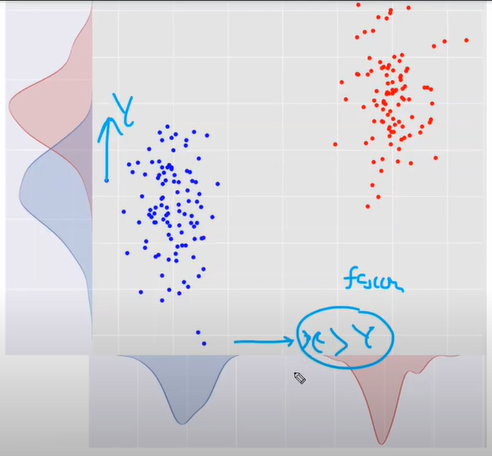

F-test(score)=Mean_between/Mean_within

In [91]:
 loan_df=pd.read_csv('https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Loan_Dataset/loan_data_set.csv')

In [92]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [93]:
loan_df=loan_df.drop('Loan_ID',axis=1)

for label encoding we can use one of the two methods.
1. using for loop method.
2. using class and object method.

In [94]:
# using for loop method
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=loan_df.columns.tolist()
for column in cols:
  if loan_df[column].dtype=='object':
    loan_df[column]=le.fit_transform(loan_df[column])

In [95]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [107]:
loan_df=loan_df.dropna()

In [108]:
y=loan_df['Loan_Status']
x=loan_df.drop(['Loan_Status'],axis=1)

##**start**

In [109]:
from sklearn.feature_selection import f_classif,SelectKBest
fs=SelectKBest(score_func=f_classif,k=4)

In [110]:
fs.fit(x,y)

SelectKBest(k=4)

In [112]:
fs.get_support()

array([False,  True, False,  True, False, False,  True, False, False,
        True, False])

In [114]:
print('p values for features are')
print(fs.pvalues_)
print('f scores for features are')
print(fs.scores_)

p values for features are
[4.45065682e-01 2.33316525e-02 8.48745667e-01 7.14677131e-02
 3.68103016e-01 8.85398242e-01 3.19621219e-01 4.00322147e-01
 5.11559888e-01 1.08303306e-42 3.92068094e-01]
f scores for features are
[5.84064295e-01 5.17375174e+00 3.64095623e-02 3.26212190e+00
 8.11451194e-01 2.07934299e-02 9.92369048e-01 7.08505625e-01
 4.31460538e-01 2.25523584e+02 7.33723930e-01]


In [117]:
features_score_classi=pd.DataFrame(fs.scores_)
features_pvalues_classi=pd.DataFrame(np.round(fs.pvalues_,4))
features_classi=pd.DataFrame(x.columns)
feature_score_classi=pd.concat([features_classi,features_score_classi,features_pvalues_classi],axis=1)
feature_score_classi.columns=['Input_features','F_scores','P_value']
print(feature_score_classi.nlargest(4,columns="F_scores"))


      Input_features    F_scores  P_value
9     Credit_History  225.523584   0.0000
1            Married    5.173752   0.0233
3          Education    3.262122   0.0715
6  CoapplicantIncome    0.992369   0.3196
